#### 回归：  

利用一条直线对一些数据点进行拟合，这个拟合过程我们称为回归，而这条拟合的线我们称为最佳拟合直线。  

但是Logistic回归是一种分类算法，其主要思想是：根据现有数据对分类边界线建立回归方程，以此进行分类。

![title.png](./picture/05逻辑回归.png)

对于逻辑回归进行分类，我们希望的是，<font color="red" size = 4>能接受所有输入然后预测类别</font>

例如，对于两种类别的情况下，输出应该为1或2，我们之前接触到的阶跃函数可以对应这种情况。  
但是，阶跃函数存在一个问题是，从0到1的瞬时跳跃不够光滑，也即不可导，这样在数学上不容易处理。  
因此，我们一般选择另一个具有相同性质且更方便处理的函数——sigmoid函数，如图
![title.png](./picture/05阶跃函数.png)

为了实现Logistic回归分类器，我们在每个特征上乘以一个回归系数，然后把所有值相加，最后将这个总和代入Sigmoid函数中，进而得到0-1之间的值，  
然后取一个阈值进行分类，一般这个阈值我们选择0.5，即大于0.5归于一类，小于0.5归于一类，因此，Logistic可以看成是一类概率估计。

现在问题转为<font color="red" size = 4>如何确定最佳回归系数</font>

### 基于最优化的方法确定最佳回归系数  

#### 1.梯度上升法
核心思想：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。  

如果梯度记为▽，则函数f(x, y)的梯度记为：
![title.png](./picture/05梯度.png)  
梯度其实就是沿着各个方向求偏导数，然后叠加这种效果，但是梯度反映的是变化最快的一个方向
![title.png](./picture/05梯度上升.png)  
梯度算子纵使沿着指向函数增长最快的方向。同时每次移动量的大小称为步长，用α表示
![title.png](./picture/05迭代公式.png)

事实上，梯度上升算法和梯度下降算法是一样的，只不过加法变成减法  
<font color="red" size = 4> 梯度上升算法用来计算函数的最大值，梯度下降算法用来计算函数的最小值</font>

<font face="微软雅黑"> <font color="red" size = 6>Talk is cheap， show me the code.</font>

#### 函数说明

In [7]:
#strip() 返回移除字符串头尾指定的字符生成的新字符串
str = "00000003210Runoob01230000000"; 
print(str.strip( '0' ))  # 去除首尾字符 0

3210Runoob0123


In [18]:
#Logistic 回归梯度上升优化算法
import pandas as pd 
import numpy as np

def loadDataSet(): #导入数据，读取文本
    dataMat = []; labelMat = []
    fr = open('./data/Logistic_testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX): #构建sigmoid函数
    return 1.0 / (1 + np.exp(-inX))  #注意这里math.exp()用于标量，而np.exp()用于数组，两者存在区别

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weigths = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weigths) #h这里是一个列向量
        error = (labelMat - h)
        weigths += alpha * dataMatrix.transpose() * error #更新权重
    return weigths   

In [19]:
#测试
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

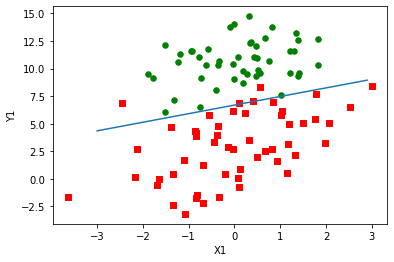

In [29]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    weights = wei
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('Y1')
    plt.show()

weights = gradAscent(dataArr, labelMat)
plotBestFit(weights)

#### 梯度上升算法每次更新回归系数时需要遍历整个数据集，对于样本较多的情况下并不适用。  

改进：随机梯度上升算法—每次仅用一个样本点来更新回归系数  

一次处理所有数据称为“批处理”

[ 1.01702007  0.85914348 -0.36579921]


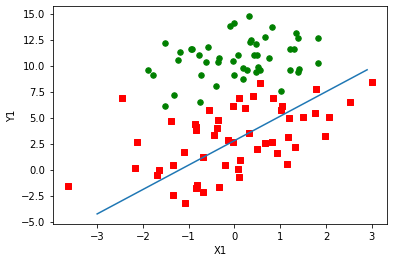

In [40]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] *weights))
        error = classLabels[i] - h
        weights += alpha * error * dataMatrix[i]
    return weights

dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(np.array(dataArr), labelMat)
print(weights)
plotBestFit(weights)

#### 对比分析
表面上看随机梯度上升方法不如批量梯度上升方法好，但这是因为后者在全部数据集上进行迭代，对比不公平  

另外根据下图发现，随机梯度上升算法的参数X0，X1收敛较慢，并且还会存在波动，针对这种现象，我们改进算法  
![title.png](./picture/05随机梯度上升参数收敛.png)

[13.73692487  1.33658039 -1.96914719]


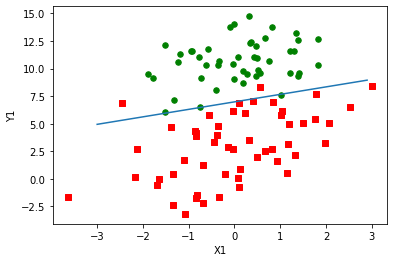

In [41]:
#优化的随机梯度上升算法
#将alpha进行动态调整，以及随机选取状态更新

import random
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m, n = np.shape(dataMatrix)
#     alpha = 0.01
    weights = np.ones(n)
    
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01 #动态调整alpha
            randIndex = int(random.uniform(0, len(dataIndex)))  #随机选取状态更新
            h = sigmoid(sum(dataMatrix[randIndex] *weights))
            error = classLabels[randIndex] - h
            weights += alpha * error * dataMatrix[randIndex]
    return weights

dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(np.array(dataArr), labelMat)
print(weights)
plotBestFit(weights)

### 示例：从疝气病预测病马的死亡率
![title.png](./picture/05使用Logistic回归估计马疝病死率.png)

#### 01准备数据：处理数据中的缺失值  

当数据缺失时，扔掉和重新获取往往是不可取的，一般采用以下方案解决：  
·使用可用特征值的均值来填充缺失值；  
·使用特殊值来填充缺失值，如-1；  
·忽略有缺失值样本；  
·使用相似样本均值填补缺失值；  
·使用另外的机器学习算法预测缺失值；  

本题采用选择实数0来替代所有缺失值，这样的话在更新系数时不会影响系数的值

 weights += alpha * error * dataMatrix[randIndex]
 
如果dataMatrix的某特征值对应0，那么该特征的系数将不进行更新，即：  
 weights = weights
 
另外由于sigmoid(0) = 0.5,即对于预测不具有倾向性，因此对于误差也不产生影响

原始数据处理后保存为horseColicTest.txt和horseColic-Training.txt

#### 02用Logistic回归分类函数

In [46]:
def classifyVector(inX, weights):   #用回归系数和特征向量作为输入来计算对应Sigmoid
    prob = sigmoid(sum(inX*weights))
    if  prob > 0.5 : return 1.0
    else: return 0.0
def colicTest():
    frTrain = open('./data/horseColicTest.txt')
    frTest = open('./data/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
            
    errorRate = (float(errorCount) / numTestVec)
    print("the error rate of this test is :%f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" %(numTests, errorSum / float(numTests)))


    
multiTest()

<ipython-input-18-3f4057c48aea>:15: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-inX))


the error rate of this test is :0.119403
the error rate of this test is :0.417910
the error rate of this test is :0.164179
the error rate of this test is :0.119403
the error rate of this test is :0.134328
the error rate of this test is :0.149254
the error rate of this test is :0.194030
the error rate of this test is :0.223881
the error rate of this test is :0.283582
the error rate of this test is :0.164179
after 10 iterations the average error rate is: 0.197015


#### 总结一下：<font color="red" size = 4>逻辑回归的本质是采用回归的思路拟合一条最优曲线，然后利用这条最优曲线对数据进行分类.</font>